
# MNIST in Keras



In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 1. Import Data Set

In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Checking the Data

(60000,)
(60000, 28, 28)


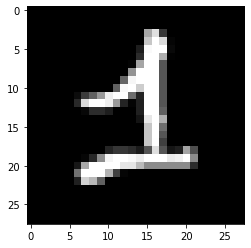

In [4]:
print(y_train.shape)
print(x_train.shape)
imagedemo = x_train[24]
plt.imshow(imagedemo,cmap='gray')

In [5]:
def print_image(img):
  s = '\n'.join([''.join(['{:4}'.format(int(round(item * 255))) for item in row]) for row in img])
  print(s)

print_image(imagedemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0423305661014025   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   05023564770555901275   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   073956349564770647702295   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   011475647706477044370 510   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0102041820647706477021675   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   03723064770647706477021675  

In [6]:
''' Reshape the input for the DNN '''
# Only TF1 had tools for preprocessing, now all is with numpy and sklearn
x_train = x_train.reshape(-1,28*28).astype('float32')  # in TF2 is important the data type for TF2 
x_test = x_test.reshape(-1,28*28).astype('float32')
print(x_train.shape)
x_train

(60000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
''' Codify the outputs from CATEGORICAL to ONE HOT '''
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train),1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test),1)
y_test_one_hot = onehot_encoder.fit_transform(y_test)
y_train_onehot.shape

(60000, 10)

# 2. Set up the architecture


## Sequential Keras

In [8]:
model = tf.keras.Sequential() # create Keras object
model.add(tf.keras.layers.Dense(500,input_shape=(784,),activation='relu')) #indicate the input
model.add(tf.keras.layers.Dense(500,activation='relu'))
model.add(tf.keras.layers.Dense(500,activation='relu'))
model.add(tf.keras.layers.Dense(10))

## Cost Function, Optimizer, Metrics 

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.binary_crossentropy,metrics = ['accuracy'])

# 3. Training & Testing Functions

In [11]:
model.fit(x = x_train, y = y_train_onehot,batch_size=100,epochs=10,validation_data=(x_test,y_test_one_hot))

Epoch 1/10
600/600 [==============================] - 10s 17ms/step - loss: 1.5425 - accuracy: 0.0987 - val_loss: 1.5425 - val_accuracy: 0.0980
Epoch 2/10
600/600 [==============================] - 10s 17ms/step - loss: 1.5425 - accuracy: 0.0987 - val_loss: 1.5425 - val_accuracy: 0.0980
Epoch 3/10
600/600 [==============================] - 10s 17ms/step - loss: 1.5425 - accuracy: 0.0987 - val_loss: 1.5425 - val_accuracy: 0.0980
Epoch 4/10
600/600 [==============================] - 10s 17ms/step - loss: 1.5425 - accuracy: 0.0987 - val_loss: 1.5425 - val_accuracy: 0.0980
Epoch 5/10
600/600 [==============================] - 10s 17ms/step - loss: 1.5425 - accuracy: 0.0987 - val_loss: 1.5425 - val_accuracy: 0.0980
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 1.5425 - accuracy: 0.0987 - val_loss: 1.5425 - val_accuracy: 0.0980
Epoch 7/10
600/600 [==============================] - 10s 17ms/step - loss: 1.5425 - accuracy: 0.0987 - val_loss: 1.5425 - val_accuracy: